In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.corpus import stopwords
import joblib
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer #converting textual data to numerical data
from sklearn.model_selection import train_test_split #used for splitting data into training data and test data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#printing stopworda in English
print(stopwords.words('english')) #extracting words that doesn't really give any meaning to the sentence

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Pre-Processing


In [5]:
#loading data
twitter = pd.read_csv(r"C:\Users\jerin\OneDrive\Documents\training.1600000.processed.noemoticon.csv", encoding='latin1', header=None)


In [6]:
twitter.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
twitter.shape

(1600000, 6)

In [9]:
#naming the columns
column_names=['target','id','date','flag','user','text']
twitter.columns=column_names

In [10]:
twitter.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
# counting the missing values
print(twitter.isnull().sum())

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [12]:
#distribution of target column
twitter['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Converting Target To 1

In [14]:
twitter['target']=twitter['target'].replace(4,1)

In [15]:
twitter.tail()

,target,id,date,flag,user,text
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


## Sentiment Distribution Visualization using Seaborn

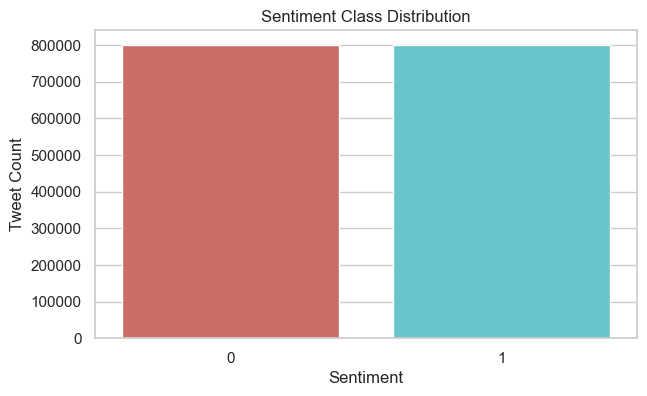

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 4))
sns.countplot(x='target', data=twitter, palette='hls', hue='target', legend=False)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

0 == **Negative** ,
1 == **Positive**

***STEMMING***

example : changing words like player ,playing, played = play

In [21]:
port_stem=PorterStemmer()


In [22]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content) #removing all the character other than alphabets
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split() #storing all the proccesed words in a list
  stemmed_content =[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #perform stemming only in words that are not present in stopwords
  stemmed_content=' '.join(stemmed_content) #joing the words into the original tweet

  return stemmed_content

In [23]:
twitter['stemmed_content']=twitter['text'].apply(stemming) #Took almost 33 min to complete the processing

In [24]:
twitter.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [25]:
print(twitter['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [26]:
print(twitter['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [27]:
#stemmed content and target are the columns required for traing the ml model

#seperating the data and traget

X=twitter['stemmed_content'].astype(str).values
Y=twitter['target'].values

In [28]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [29]:
print(Y)

[0 0 0 ... 1 1 1]


Splitting the data as training data and testing data

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

#stratify is used to classify negative and positive tweets equally in the traing data

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


FEATURE EXTRACTION

In [34]:
#converting textual data to numerical data since machine understands only numerical data

# Convert textual data to numerical using TF-IDF
print(type(X_train), type(X_train[0]))  # Should print <class 'numpy.ndarray'> and <class 'str'>




<class 'numpy.ndarray'> <class 'str'>


In [35]:
#converting textual data to numerical data since machine understands only numerical data
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [36]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [37]:
print(X_test)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

Training ML model (LOGISTIC REGRESSION)

In [39]:
model=LogisticRegression(max_iter=1000)

In [40]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [43]:
#accuracy scores on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [44]:
print('Accuracy Score on Traing Data: ',training_data_accuracy)

Accuracy Score on Traing Data:  0.79871953125


In [45]:
#accuracy score on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy Score on Test Data: ',test_data_accuracy)

Accuracy Score on Test Data:  0.77668125


Saving model

Model accuracy = 77.7%


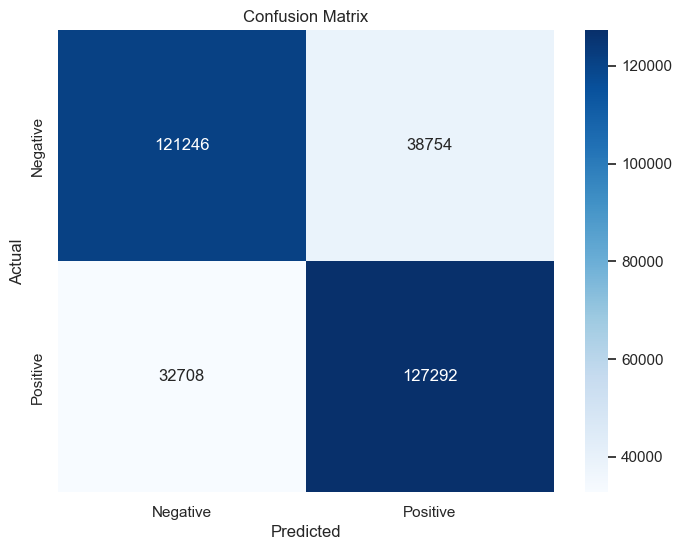

In [48]:
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

Using model for future prediction

In [54]:
joblib.dump(model,'sentiment_model.pkl')
joblib.dump(vectorizer,'vectorizer.pkl')

#Load the saved model for prediction
try:
    loaded_model=pickle.load(open('trained_model.sav','rb'))
except:
    print("Model file not found. Ensure 'trained_model.sav' exists in the working directory.")
    loaded_model=model
    

In [58]:
# Make a sample prediction

X_new = X_test[400].reshape(1, -1)  # Reshape if needed, depending on the model's expected input shape
print(f"Actual label: {Y_test[400]}")  # Use standard indexing for NumPy array

prediction = loaded_model.predict(X_new)
print(f"Prediction: {prediction}")

if prediction[0] == 0:
    print("Negative tweet")
else:
    print("Positive tweet")


Actual label: 1
Prediction: [1]
Positive tweet
